<a href="https://colab.research.google.com/github/EvaLiho/WoTech/blob/main/10_08_24_Pokemon_2_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')

# CORRELATION

### Scatter Plot

Text(0, 0.5, 'Defense')

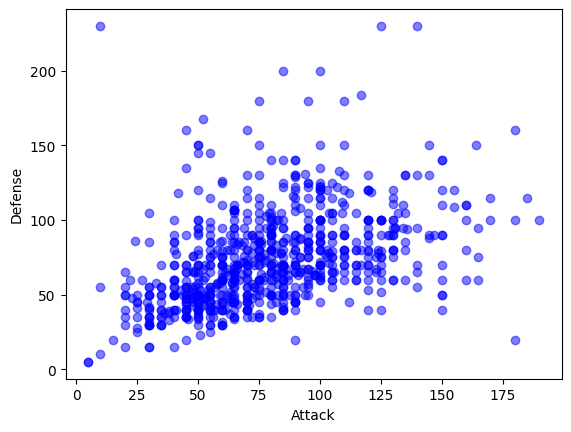

In [6]:
# scatter plot between variables: Attack and Defense

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='blue', alpha=0.5)

plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0.5, 1.0, 'Scatter plot')

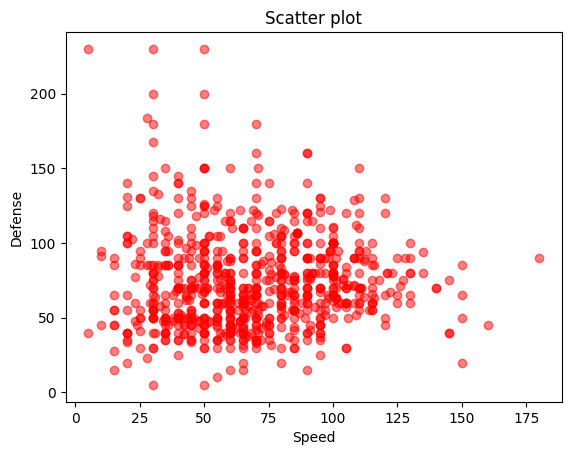

In [7]:
# scatterplot for variables: Speed and Defense

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='red', alpha=0.5)

plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Scatter plot')

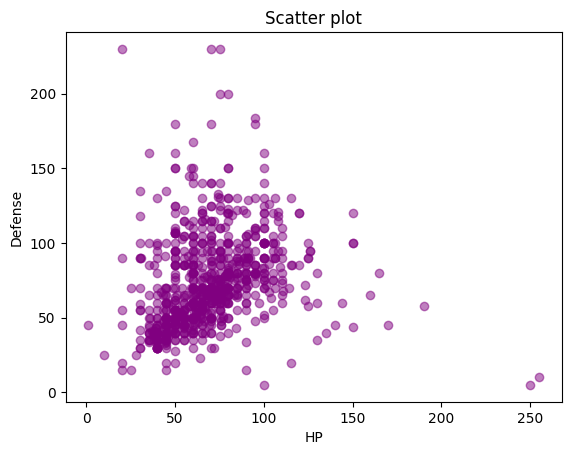

In [8]:
# scatterplot for variables: HP and Defense

plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='purple', alpha=0.5)

plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Scatter plot')

### Pearson correlation

In [ ]:
# Result of this correlation calculation is between -1 and 1.
# -1 perfect negative relationship
# 1 perfect positive relationship

In [9]:
# Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [10]:
# Pearson correlation between Speed/Defense

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation2

0.015226598088597448

### For loop for Attack against every other numeric value

In [15]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


In [14]:
# drop #-column
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [12]:
target_column = 'Attack'
correlation_results = {} #results into dictionary where key = column, val=pearson_correlation

# for loop comparing target column and all other columns in the DataFrame

for col in numeric_columns.columns:
  if col =='Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

### Correlation matrix

In [17]:
correlation_matrix = numeric_columns.corr() #all columns are numeric
correlation_matrix

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with seaborn

In [18]:
import seaborn as sns

<Axes: >

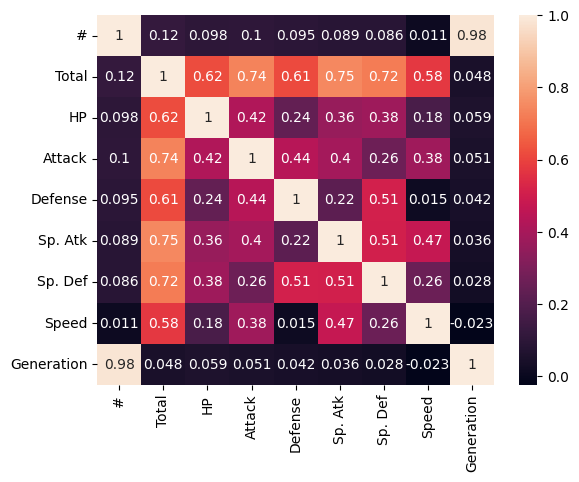

In [21]:
sns.heatmap(correlation_matrix, annot=True)   #annot adds values

Text(0.5, 1.0, 'Correlation Matrix')

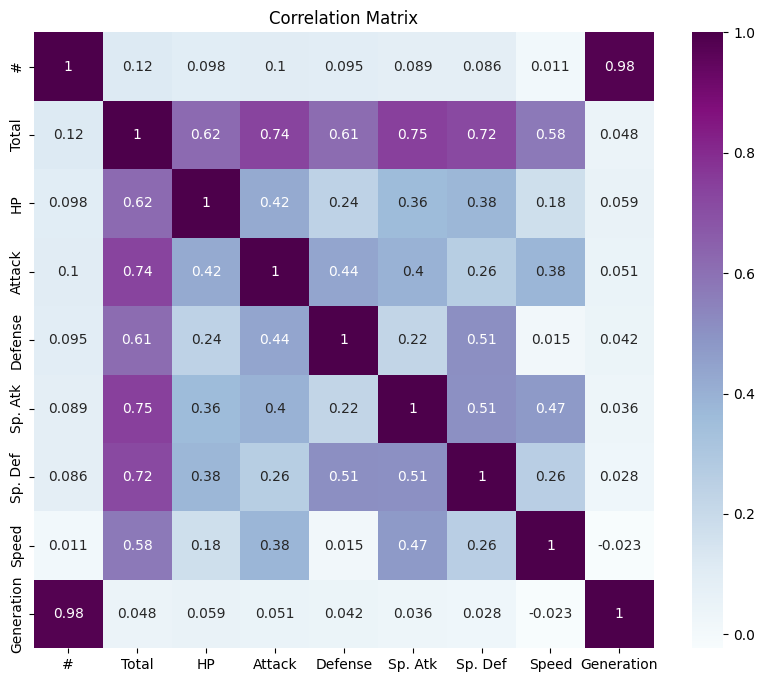

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu") #annotation -adding values
plt.title('Correlation Matrix')

### Linear regression (predict one value based on the other)

<Axes: xlabel='Attack', ylabel='Defense'>

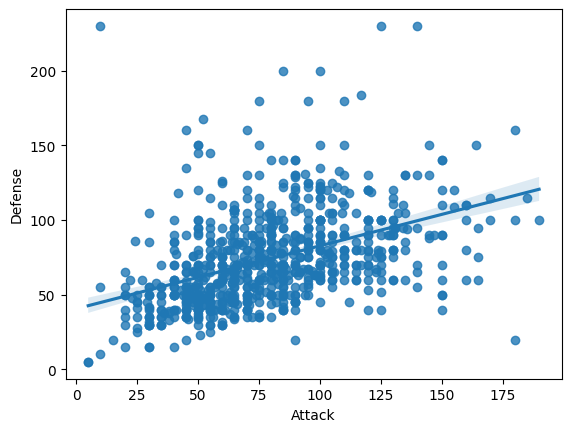

In [26]:
sns.regplot(x='Attack', y='Defense', data=pokemon_df)

<Axes: xlabel='Attack', ylabel='Defense'>

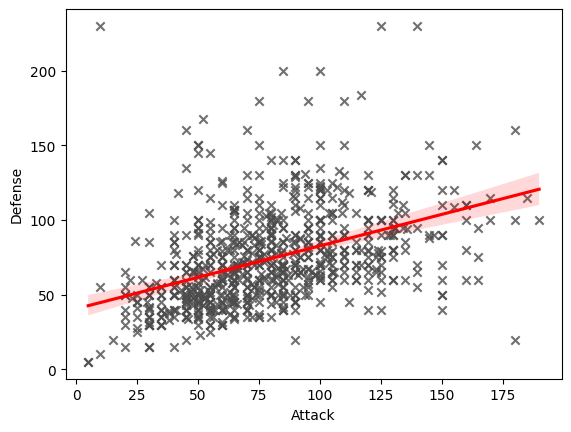

In [27]:
sns.regplot(
    data=pokemon_df, x='Attack', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

Pearson correlation coefficient: 0.015226598088597448


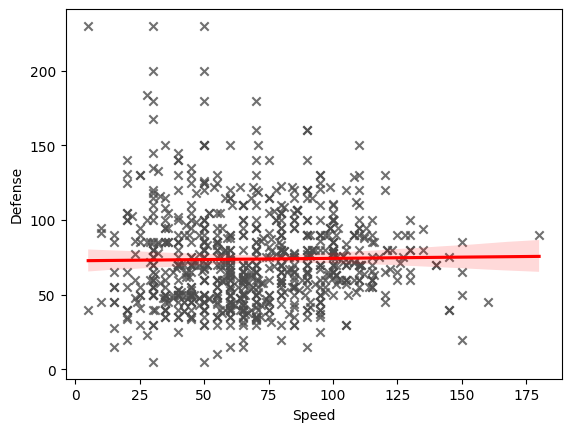

In [23]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense", ci=99,marker="x", color=".3", line_kws={'color':"r"},
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

Text(0.5, 1.0, 'Speed vs Defense')

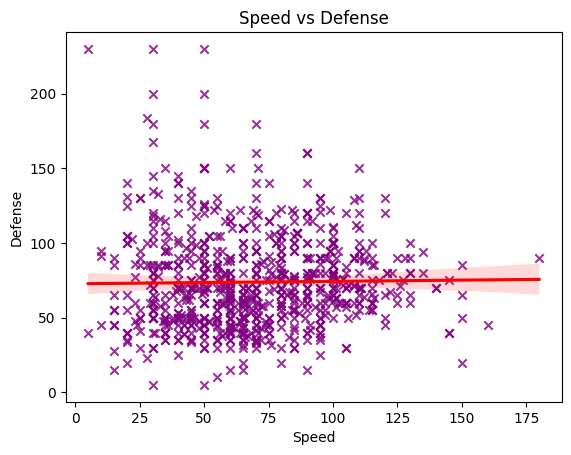

In [24]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')